The key aspect of ride-hailing is the price. It relies on technology to collect accurate tracking data so that a fair price can be calculated at the end of the trip. Fortunately, our riders are quick to tell us when they overpaid and we can use that feedback to improve our product.
Please analyze the dataset to identify top opportunities for reducing the number of overcharge tickets and present your results. Please provide us with a PDF file/document with the findings. Finally, you shouldn’t spend more than 8 hours on this analysis.
Variables in the file:
order_id_new, order_try_id_new - id of an order
calc_created- time when the order was created
metered_price, distance, duration- actual price, distance and duration of a ride
upfront_price- promised to the rider price, based on predicted duration (predicted_duration) and distance (predicted_distance)
distance - ride distance
duration - ride duration
gps_confidence- indicator for good GPS connection (1 - good one, 0 - bad one)
entered_by- who entered the address
b_state- state of a ride (finished implies that the ride was actually done)
dest_change_number- number of destination changes by a rider
predicted distance - predicted duration of a ride based on the pickup and dropoff points entered by the rider requesting a car
predicted duration - predicted duration of a ride based on the pickup and dropoff points entered by the rider requesting a car
prediction_price_type- internal variable for the type of prediction:
upfront, prediction - prediction happened before the ride
upfront_destination_changed - prediction happened after rider changed destination during the ride
change_reason_pricing - records due to whose action the price changed
ticket_id_new - id for customer support ticket

https://drive.google.com/file/d/1ZNLnbwS3hnhjy3_6CYBcSu_72PCEcnVd/view?usp=sharing


In [2]:
!gdown 1ZNLnbwS3hnhjy3_6CYBcSu_72PCEcnVd

Downloading...
From: https://drive.google.com/uc?id=1ZNLnbwS3hnhjy3_6CYBcSu_72PCEcnVd
To: /content/Analytical_Task_2 (taxi startup).csv
100% 792k/792k [00:00<00:00, 102MB/s]


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/content/Analytical_Task_2 (taxi startup).csv')

In [5]:
df.head()

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 3:37:31,4.04,10.0,2839,700,1,client,finished,...,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 2:26:19,6.09,3.6,5698,493,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 6:34:54,72871.72,NaN,49748,1400,0,client,finished,...,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,...,NaN,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN


In [6]:
df.columns

Index(['order_id_new', 'order_try_id_new', 'calc_created', 'metered_price',
       'upfront_price', 'distance', 'duration', 'gps_confidence', 'entered_by',
       'b_state', 'dest_change_number', 'prediction_price_type',
       'predicted_distance', 'predicted_duration', 'change_reason_pricing',
       'ticket_id_new', 'device_token', 'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'driver_device_uid_new',
       'device_name', 'eu_indicator', 'overpaid_ride_ticket', 'fraud_score'],
      dtype='object')

In [7]:
df['overpaid_ride_ticket'].value_counts()

0    4606
1     337
Name: overpaid_ride_ticket, dtype: int64

In [8]:
len(df)

4943

In [9]:
df['calc_created'] = pd.to_datetime(df['calc_created'],format='%Y-%m-%d %H:%M:%S')

смотрим за какой период данные в таблице:

In [10]:
df['calc_created'].agg(['min','max'])

min   2020-02-02 00:01:16
max   2020-03-13 23:52:07
Name: calc_created, dtype: datetime64[ns]

смотрим какие данные не заполнены:

In [11]:
df.isna().mean()

order_id_new             0.000000
order_try_id_new         0.000000
calc_created             0.000000
metered_price            0.004046
upfront_price            0.310338
distance                 0.000000
duration                 0.000000
gps_confidence           0.000000
entered_by               0.000000
b_state                  0.000000
dest_change_number       0.000000
prediction_price_type    0.004046
predicted_distance       0.004046
predicted_duration       0.004046
change_reason_pricing    0.939713
ticket_id_new            0.000000
device_token             1.000000
rider_app_version        0.003237
order_state              0.000000
order_try_state          0.000000
driver_app_version       0.000000
driver_device_uid_new    0.000000
device_name              0.000000
eu_indicator             0.000000
overpaid_ride_ticket     0.000000
fraud_score              0.558163
dtype: float64

устанавливаем catboost, что-бы посморереть, какие переменные важны для кэтбуста. если они важны для него, знач важны  для нас :))

In [12]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.2 MB/s eta 0:00:00


In [13]:
from catboost import CatBoostClassifier

переводим дату в фичу и удаляем нули для удобства восприятия -> для этого делим на 10**9

In [14]:
df['dt_unix'] = df['calc_created'].astype(int) / 10**9

(~) - знак нверсии говорит о том, что будут выведены все заполненные строки фичи. Без нее будет наоборот.

In [15]:
df = df[(~df['prediction_price_type'].isna()) & (~df['rider_app_version'].isna())].copy()

разбиваем df на train и test:

In [16]:
train = df.sample(frac=0.7, random_state=42).copy()

в validation то, что осталось от трейн (~)

In [17]:
validation = df[~df.index.isin(train.index)].copy()

In [22]:
len(train)

3446

In [23]:
len(validation)

1477

In [24]:
len(train) + len(validation)

4923

In [25]:
len(df)

4923

In [26]:
df.columns

Index(['order_id_new', 'order_try_id_new', 'calc_created', 'metered_price',
       'upfront_price', 'distance', 'duration', 'gps_confidence', 'entered_by',
       'b_state', 'dest_change_number', 'prediction_price_type',
       'predicted_distance', 'predicted_duration', 'change_reason_pricing',
       'ticket_id_new', 'device_token', 'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'driver_device_uid_new',
       'device_name', 'eu_indicator', 'overpaid_ride_ticket', 'fraud_score',
       'dt_unix'],
      dtype='object')

категориальные фичи(которые являюся объектами), мы должны обозначить для кэтбуста:

In [43]:
df.select_dtypes(include='object').isna().mean()

entered_by               0.000000
b_state                  0.000000
prediction_price_type    0.000000
change_reason_pricing    0.939468
rider_app_version        0.000000
order_state              0.000000
order_try_state          0.000000
driver_app_version       0.000000
device_name              0.000000
dtype: float64

незаполненную фичу change_reason_pricing - удаляем.

In [44]:
df.select_dtypes(include='object').columns

Index(['entered_by', 'b_state', 'prediction_price_type',
       'change_reason_pricing', 'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'device_name'],
      dtype='object')

In [45]:
X_col = ['order_id_new', 'order_try_id_new', 'metered_price',
       'upfront_price', 'distance', 'duration', 'gps_confidence', 'entered_by',
       'b_state', 'dest_change_number', 'prediction_price_type',
       'predicted_distance', 'predicted_duration',
       'ticket_id_new', 'device_token', 'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'driver_device_uid_new',
       'device_name', 'eu_indicator', 'fraud_score',
       'dt_unix']

In [46]:
y_col = ['overpaid_ride_ticket']

In [47]:
cat_features = ['entered_by', 'b_state', 'prediction_price_type',
       'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'device_name']

In [48]:
model = CatBoostClassifier(eval_metric = 'AUC', cat_features = cat_features, verbose=100)

In [49]:
model.fit(train[X_col], train[y_col], eval_set=(validation[X_col], validation[y_col]))

Learning rate set to 0.043016
0:	test: 0.8134606	best: 0.8134606 (0)	total: 10.4ms	remaining: 10.4s
100:	test: 0.8655847	best: 0.8678081 (32)	total: 657ms	remaining: 5.84s
200:	test: 0.8592635	best: 0.8678081 (32)	total: 1.32s	remaining: 5.25s
300:	test: 0.8544281	best: 0.8678081 (32)	total: 2.03s	remaining: 4.71s
400:	test: 0.8469160	best: 0.8678081 (32)	total: 2.73s	remaining: 4.08s
500:	test: 0.8455057	best: 0.8678081 (32)	total: 3.4s	remaining: 3.38s
600:	test: 0.8428290	best: 0.8678081 (32)	total: 4.08s	remaining: 2.71s
700:	test: 0.8405840	best: 0.8678081 (32)	total: 4.77s	remaining: 2.03s
800:	test: 0.8360868	best: 0.8678081 (32)	total: 5.46s	remaining: 1.36s
900:	test: 0.8352341	best: 0.8678081 (32)	total: 6.31s	remaining: 694ms
999:	test: 0.8330683	best: 0.8678081 (32)	total: 7.82s	remaining: 0us

bestTest = 0.8678081108
bestIteration = 32

Shrink model to first 33 iterations.


In [50]:
fi = pd.DataFrame({'feature':X_col,'fi':model.feature_importances_})

<Axes: xlabel='feature'>

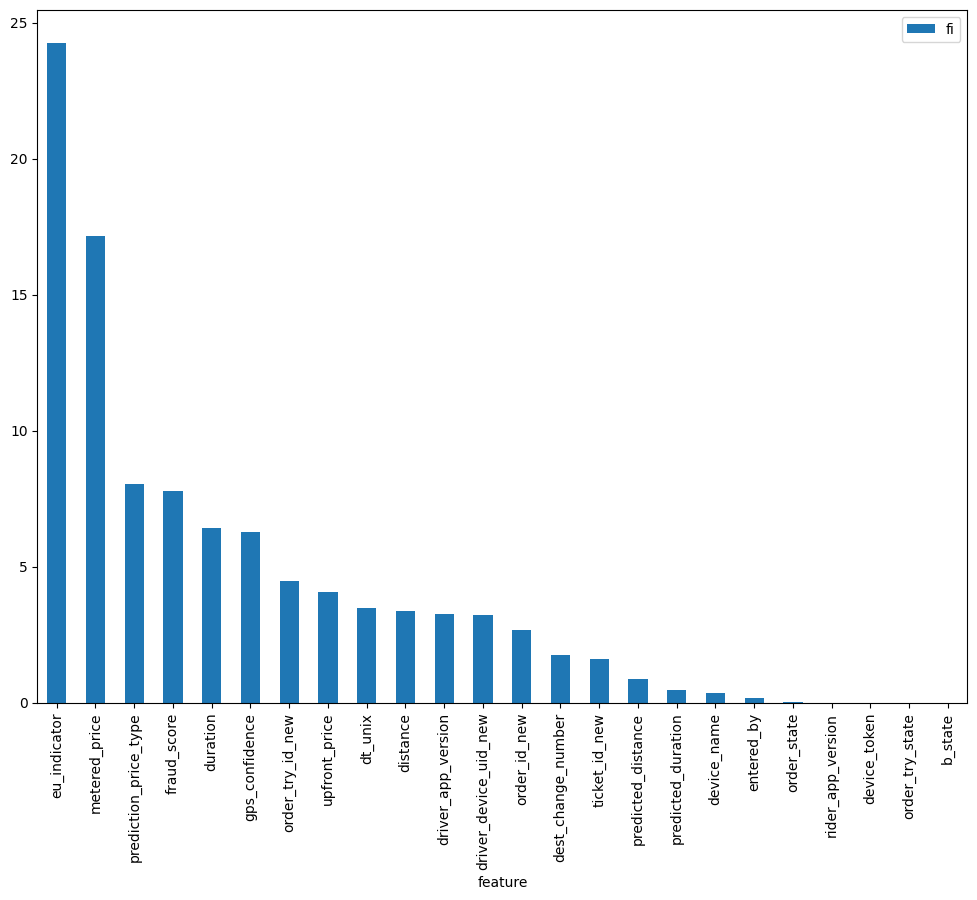

In [51]:
fi.sort_values('fi',ascending=False).set_index('feature').plot(kind='bar',figsize=(12,9))

In [52]:
df = pd.read_csv('Analytical_Task_2 (taxi startup).csv')
df['calc_created'] = pd.to_datetime(df['calc_created'],format='%Y-%m-%d %H:%M:%S')

In [53]:
df['metered_price']

0           4.04
1           6.09
2           4.32
3       72871.72
4       20032.50
          ...   
4938       10.89
4939     8789.28
4940        7.50
4941        3.06
4942    29244.10
Name: metered_price, Length: 4943, dtype: float64

<Axes: >

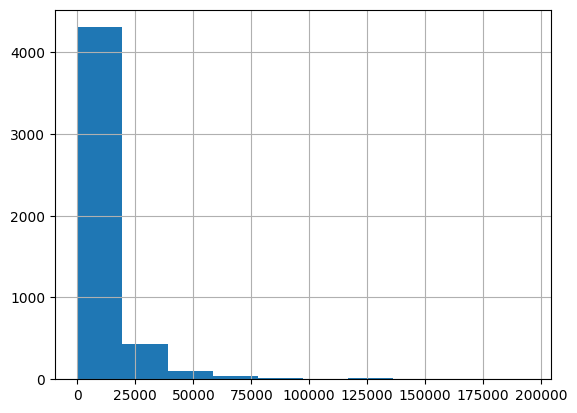

In [54]:
df['metered_price'].hist()

In [55]:
df['metered_price_bin'] = pd.qcut(df['metered_price'],5)

In [56]:
df['overpaid_ride_ticket']

0       0
1       0
2       0
3       1
4       0
       ..
4938    0
4939    0
4940    0
4941    0
4942    0
Name: overpaid_ride_ticket, Length: 4943, dtype: int64

In [57]:
df.groupby('metered_price_bin')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
metered_price_bin,,
"(1.999, 4.72]",992,0.000000
"(4.72, 8.25]",978,0.005112
"(8.25, 6000.0]",1291,0.040279
"(6000.0, 13835.1]",677,0.138848
"(13835.1, 194483.52]",985,0.188832


делаем сводник по 'prediction_price_type':

In [58]:
df.groupby('prediction_price_type')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
prediction_price_type,,
prediction,1279,0.173573
upfront,3432,0.032634
upfront_destination_changed,208,0.014423
upfront_waypoint_changed,4,0.000000


вся проблема в prediction

In [59]:
df['eu_indicator']

0       1
1       1
2       1
3       0
4       0
       ..
4938    1
4939    0
4940    1
4941    1
4942    0
Name: eu_indicator, Length: 4943, dtype: int64

In [60]:
df.groupby('eu_indicator')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
eu_indicator,,
0,2173,0.149103
1,2770,0.004693


In [61]:
df['fraud_score'].isna().mean()

0.5581630588711309

In [62]:
df['fraud_score'] = df['fraud_score'].fillna(-9999)

In [63]:
df['fraud_bin'] = pd.qcut(df['fraud_score'],5,duplicates='drop')

In [64]:
df.groupby('fraud_bin')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
fraud_bin,,
"(-14225.001, -9999.0]",2764,0.115774
"(-9999.0, -1850.0]",203,0.014778
"(-1850.0, -228.0]",988,0.007085
"(-228.0, 49.0]",988,0.007085


In [65]:
df['gps_confidence']

0       1
1       1
2       1
3       0
4       1
       ..
4938    1
4939    0
4940    1
4941    1
4942    1
Name: gps_confidence, Length: 4943, dtype: int64

In [66]:
df.groupby('gps_confidence')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
gps_confidence,,
0,985,0.204061
1,3958,0.034361


In [67]:
df['device_name']

0          Xiaomi Redmi 6
1        Samsung SM-G965F
2        Samsung SM-A530F
3                TECNO-Y6
4              Itel W5504
              ...        
4938       HUAWEI LYA-L29
4939     Samsung SM-G928F
4940       HUAWEI AMN-LX9
4941    TP-Link Neffos X1
4942     Samsung SM-A260F
Name: device_name, Length: 4943, dtype: object

In [68]:
t = df.groupby('device_name')['overpaid_ride_ticket'].agg(['count','mean'])

In [69]:
t

,count,mean
device_name,,
Alps F9 Pro,10,0.000000
Alps NODROPOUT T25,1,0.000000
Alps TECNO B1p,1,0.000000
Asus ASUS_A002,5,0.000000
Asus ASUS_X00TD,3,0.000000
...,...,...
"iPhone8,1",91,0.010989
"iPhone8,2",18,0.000000
"iPhone8,4",35,0.000000


In [70]:
t.sort_values('mean',ascending=False)

,count,mean
device_name,,
TECNO-C7,1,1.0
Samsung GT-N7100,2,1.0
HTC U Ultra,1,1.0
TECNO-Y6,1,1.0
HTC One X10,1,1.0
...,...,...
LGE LG-K350,3,0.0
LGE LG-H990,1,0.0
LGE LG-H815,2,0.0


In [71]:
def device_cat(device_name):
  if 'tecno' in device_name.lower():
    return 'tecno'
  if 'iphone' in device_name.lower():
    return 'iphone'
  if 'lg' in device_name.lower():
    return 'lg'
  if 'samsung' in device_name.lower():
    return 'samsung'
  if 'htc' in device_name.lower():
    return 'htc'
  if 'nokia' in device_name.lower():
    return 'nokia'
  if 'xiaomi'in device_name.lower():
    return 'xiaomi'
  if 'HUAWEI'.lower() in device_name.lower():
    return 'HUAWEI'.lower()
  return 'misc'

In [72]:
df['device_group'] = df['device_name'].apply(device_cat)

In [73]:
df.groupby('device_group')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
device_group,,
htc,16,0.312500
huawei,724,0.019337
iphone,426,0.021127
lg,39,0.000000
misc,703,0.095306
nokia,158,0.113924
samsung,1683,0.038622
tecno,933,0.167203
xiaomi,261,0.011494


In [74]:
df.groupby('device_group')['overpaid_ride_ticket'].agg(['count','mean']).sort_values('mean',ascending=False)

,count,mean
device_group,,
htc,16,0.312500
tecno,933,0.167203
nokia,158,0.113924
misc,703,0.095306
samsung,1683,0.038622
iphone,426,0.021127
huawei,724,0.019337
xiaomi,261,0.011494
lg,39,0.000000


в итоге снавная часть багов на телефонах tecno. и htc, но их мало.

In [75]:
df['dur_bin'] = pd.qcut(df['duration'],5)

In [76]:
df.groupby('dur_bin')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
dur_bin,,
"(-0.001, 517.0]",992,0.033266
"(517.0, 863.0]",987,0.030395
"(863.0, 1304.0]",988,0.051619
"(1304.0, 2241.2]",987,0.105370
"(2241.2, 22402.0]",989,0.120324


In [77]:
df

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score,metered_price_bin,fraud_bin,device_group,dur_bin
0,22,22,2020-02-02 03:37:31,4.04,10.0,2839,700,1,client,finished,...,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0,"(1.999, 4.72]","(-1850.0, -228.0]",xiaomi,"(517.0, 863.0]"
1,618,618,2020-02-08 02:26:19,6.09,3.6,5698,493,1,client,finished,...,DA.4.39,1578,Samsung SM-G965F,1,0,-9999.0,"(4.72, 8.25]","(-14225.001, -9999.0]",samsung,"(-0.001, 517.0]"
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,...,DA.4.37,951,Samsung SM-A530F,1,0,-166.0,"(1.999, 4.72]","(-228.0, 49.0]",samsung,"(517.0, 863.0]"
3,313,313,2020-02-05 06:34:54,72871.72,NaN,49748,1400,0,client,finished,...,DA.4.37,1587,TECNO-Y6,0,1,-9999.0,"(13835.1, 194483.52]","(-14225.001, -9999.0]",tecno,"(1304.0, 2241.2]"
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,...,DA.4.37,433,Itel W5504,0,0,-9999.0,"(13835.1, 194483.52]","(-14225.001, -9999.0]",misc,"(2241.2, 22402.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,3513,3513,2020-03-07 17:42:34,10.89,13.7,15672,1449,1,client,finished,...,DA.4.37,1612,HUAWEI LYA-L29,1,0,-286.0,"(8.25, 6000.0]","(-1850.0, -228.0]",huawei,"(1304.0, 2241.2]"
4939,2192,2192,2020-02-22 18:15:45,8789.28,NaN,5712,1173,0,client,finished,...,DA.4.37,859,Samsung SM-G928F,0,0,-9999.0,"(6000.0, 13835.1]","(-14225.001, -9999.0]",samsung,"(863.0, 1304.0]"
4940,4051,4051,2020-03-12 23:08:31,7.50,7.4,5303,486,1,client,finished,...,DA.4.42,2061,HUAWEI AMN-LX9,1,0,-192.0,"(4.72, 8.25]","(-228.0, 49.0]",huawei,"(-0.001, 517.0]"
4941,3636,3636,2020-03-08 20:15:04,3.06,8.1,3528,338,1,client,finished,...,DA.4.39,2101,TP-Link Neffos X1,1,0,-228.0,"(1.999, 4.72]","(-1850.0, -228.0]",misc,"(-0.001, 517.0]"


In [78]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.0 MB/s eta 0:00:00


In [79]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train[X_col])

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], train[X_col].iloc[0,:])

красные метрики, которые больше всего влияют на оверпрайс поездку

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


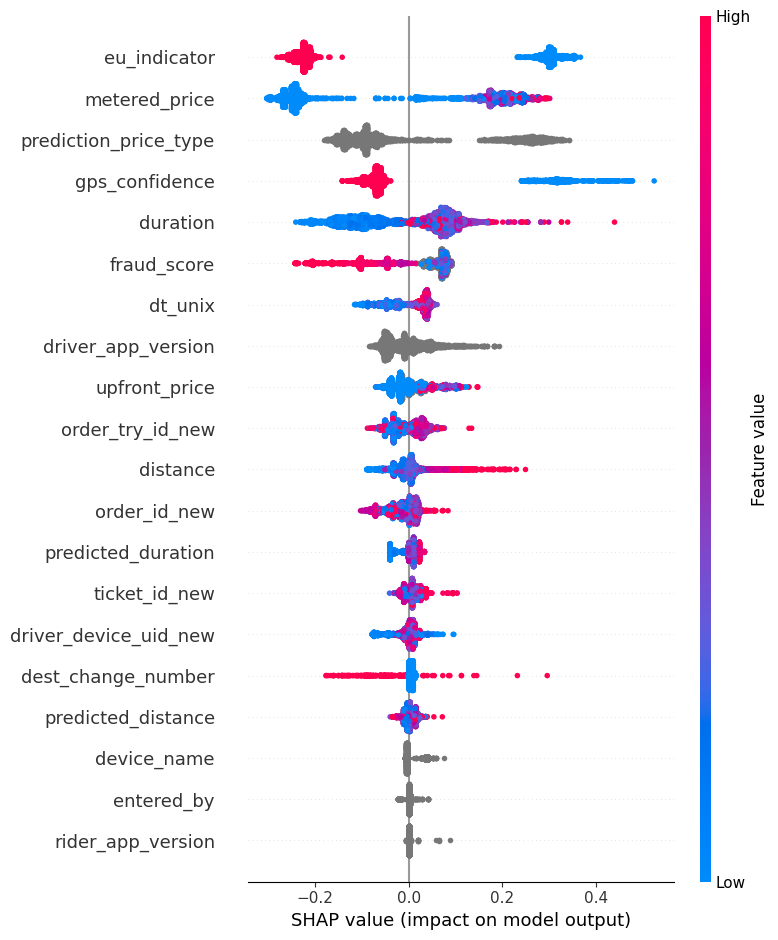

In [80]:
shap.summary_plot(shap_values, train[X_col])

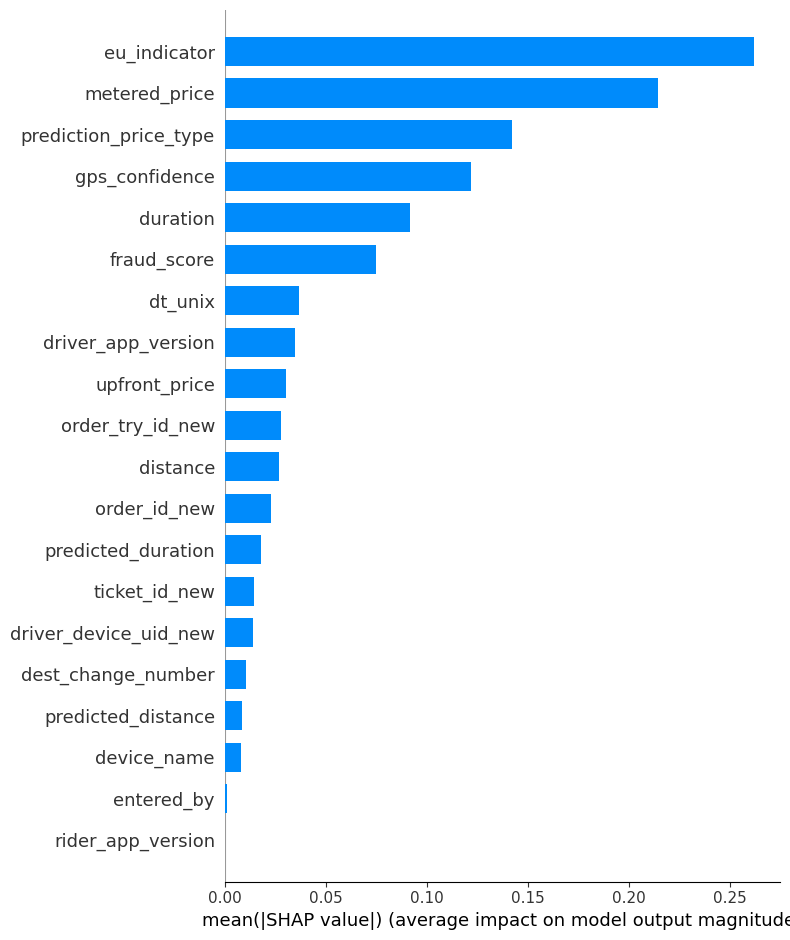

In [82]:
shap.summary_plot(shap_values, train[X_col], plot_type="bar")

In [83]:
df

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score,metered_price_bin,fraud_bin,device_group,dur_bin
0,22,22,2020-02-02 03:37:31,4.04,10.0,2839,700,1,client,finished,...,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0,"(1.999, 4.72]","(-1850.0, -228.0]",xiaomi,"(517.0, 863.0]"
1,618,618,2020-02-08 02:26:19,6.09,3.6,5698,493,1,client,finished,...,DA.4.39,1578,Samsung SM-G965F,1,0,-9999.0,"(4.72, 8.25]","(-14225.001, -9999.0]",samsung,"(-0.001, 517.0]"
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,...,DA.4.37,951,Samsung SM-A530F,1,0,-166.0,"(1.999, 4.72]","(-228.0, 49.0]",samsung,"(517.0, 863.0]"
3,313,313,2020-02-05 06:34:54,72871.72,NaN,49748,1400,0,client,finished,...,DA.4.37,1587,TECNO-Y6,0,1,-9999.0,"(13835.1, 194483.52]","(-14225.001, -9999.0]",tecno,"(1304.0, 2241.2]"
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,...,DA.4.37,433,Itel W5504,0,0,-9999.0,"(13835.1, 194483.52]","(-14225.001, -9999.0]",misc,"(2241.2, 22402.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,3513,3513,2020-03-07 17:42:34,10.89,13.7,15672,1449,1,client,finished,...,DA.4.37,1612,HUAWEI LYA-L29,1,0,-286.0,"(8.25, 6000.0]","(-1850.0, -228.0]",huawei,"(1304.0, 2241.2]"
4939,2192,2192,2020-02-22 18:15:45,8789.28,NaN,5712,1173,0,client,finished,...,DA.4.37,859,Samsung SM-G928F,0,0,-9999.0,"(6000.0, 13835.1]","(-14225.001, -9999.0]",samsung,"(863.0, 1304.0]"
4940,4051,4051,2020-03-12 23:08:31,7.50,7.4,5303,486,1,client,finished,...,DA.4.42,2061,HUAWEI AMN-LX9,1,0,-192.0,"(4.72, 8.25]","(-228.0, 49.0]",huawei,"(-0.001, 517.0]"
4941,3636,3636,2020-03-08 20:15:04,3.06,8.1,3528,338,1,client,finished,...,DA.4.39,2101,TP-Link Neffos X1,1,0,-228.0,"(1.999, 4.72]","(-1850.0, -228.0]",misc,"(-0.001, 517.0]"


In [84]:
[col for col in df.columns if 'price' in col]

['metered_price',
 'upfront_price',
 'prediction_price_type',
 'metered_price_bin']

In [85]:
df['distance_err'] = df['distance'] - df['predicted_distance']

In [86]:
df['duration_err'] = df['duration'] - df['predicted_duration']

In [88]:
df['distance_err_pct'] = np.abs(df['distance_err'])/(df['distance'])
df['duration_err_pct'] = np.abs(df['duration_err'])/df['duration']

разница в предварительных данных программы и по факту

фильтруем значения с нулем(при делении на который получается ноль)



In [89]:
df.replace([np.inf, -np.inf], np.nan)['distance_err_pct'].agg(['mean','median'])

mean      37.434295
median     0.163026
Name: distance_err_pct, dtype: float64

In [90]:
df.replace([np.inf, -np.inf], np.nan)['duration_err_pct'].agg(['mean','median'])

mean      3.195506
median    0.279104
Name: duration_err_pct, dtype: float64

<Axes: >

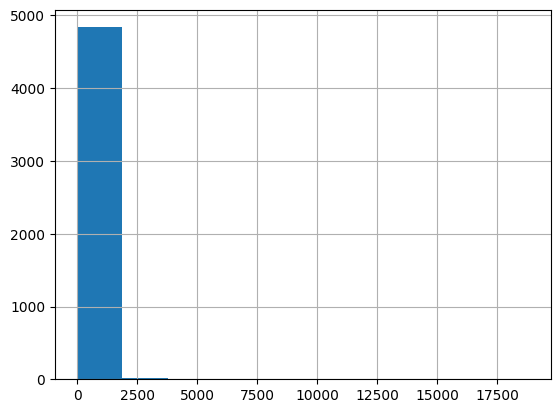

In [91]:
df.replace([np.inf, -np.inf], np.nan)['distance_err_pct'].hist()

<Axes: >

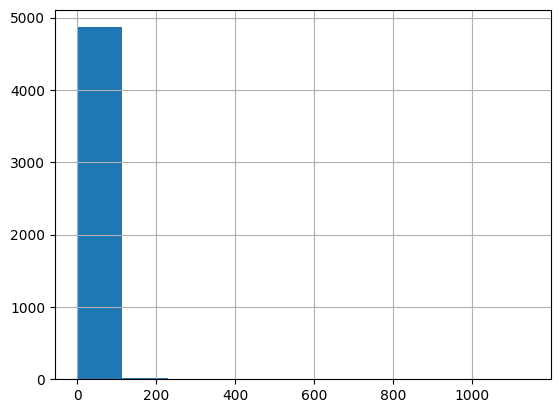

In [92]:
df.replace([np.inf, -np.inf], np.nan)['duration_err_pct'].hist()

<Axes: >

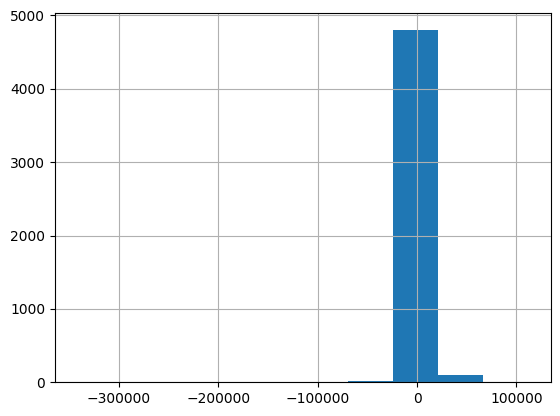

In [93]:
df.replace([np.inf, -np.inf], np.nan)['distance_err'].hist()

<Axes: >

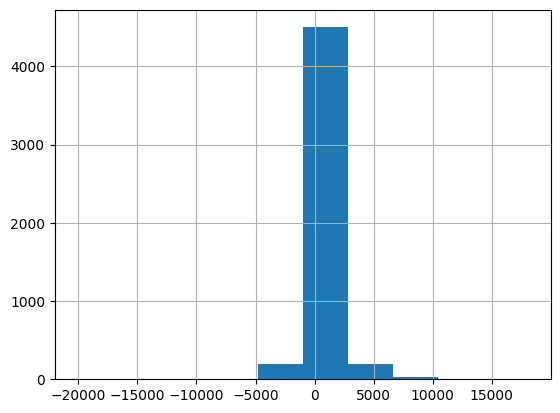

In [94]:
df.replace([np.inf, -np.inf], np.nan)['duration_err'].hist()

In [95]:
df['distance_err_bin'] = pd.qcut(df['distance_err'],5)

In [96]:
df.groupby('distance_err_bin')[['overpaid_ride_ticket','upfront_price','metered_price']].agg(['count','mean'])

overpaid_ride_ticket           upfront_price  \
                                     count      mean         count   
distance_err_bin                                                     
(-341860.001, -754.8]                  985  0.072081           622   
(-754.8, 0.0]                         1007  0.065541           693   
(0.0, 581.4]                           962  0.028067           784   
(581.4, 2466.0]                        984  0.033537           743   
(2466.0, 112012.0]                     985  0.142132           567   

                                   metered_price                
                              mean         count          mean  
distance_err_bin                                                
(-341860.001, -754.8]  9338.362058           985   6481.735442  
(-754.8, 0.0]          2072.340693          1007   5745.271192  
(0.0, 581.4]           1255.807270           962   3210.857422  
(581.4, 2466.0]        2696.943607           984   5552.151494  
(2466.0, 112012.0]     6964.358201           985  18938.390640

In [97]:
df['duration_err_bin'] = pd.qcut(df['duration_err'],5)

In [98]:
df.groupby('duration_err_bin')[['overpaid_ride_ticket','upfront_price','metered_price']].agg(['count','mean'])

overpaid_ride_ticket           upfront_price  \
                                    count      mean         count   
duration_err_bin                                                    
(-20081.001, -122.0]                  986  0.070994           729   
(-122.0, 34.0]                        988  0.033401           880   
(34.0, 257.0]                         982  0.027495           787   
(257.0, 845.0]                        983  0.090539           624   
(845.0, 18086.0]                      984  0.119919           389   

                                   metered_price                
                              mean         count          mean  
duration_err_bin                                                
(-20081.001, -122.0]   7674.807545           986   6989.042434  
(-122.0, 34.0]          780.946477           988   1707.660152  
(34.0, 257.0]          1541.834180           982   3134.069287  
(257.0, 845.0]         3527.216026           983   8091.943194  
(845.0, 18086.0]      11530.057841           984  20087.473496